In [1]:
# Theses are different ways to display figures, depending on the
# environment, some may work better or some not at all:
%matplotlib inline
# %matplotlib notebook
# %matplotlib ipympl
# %matplotlib widget
#      widget, if installed and working, gives nicer inline plots
# %matplotlib nbagg
# Fix failing variable completion (for older installations):
# %config Completer.use_jedi = False

# Noisy Usecase

We define and optimize the Rosenbrock function with additive noise. The optimal solution is in all-ones.

In [2]:
# pip install cma  # outcomment in case the cma module is not installed
import numpy as np
import cma

def fun(x):
    return cma.ff.rosen(x) + np.random.rand()

def print_favorite(es):
    def distance_to_optimum(x):
        return sum((x - 1)**2)**0.5
    print("ftrue(mean) = {}, ||mean - x_opt|| = {}".format(  # xfavorite == es.mean
            cma.ff.rosen(es.result.xfavorite), distance_to_optimum(es.result.xfavorite)))

x0 = 14 * [-0.1]  # initial solution
sigma0 = 1    # initial standard deviation to sample new solutions

Sanity check without noise.

(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 14 (seed=637987, Mon Sep 16 18:18:22 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 4.606008904525868e+02 1.0e+00 9.21e-01  9e-01  9e-01 0:00.0
    2     22 1.483699528780769e+03 1.1e+00 9.09e-01  9e-01  9e-01 0:00.0
    3     33 1.454977697181806e+03 1.1e+00 8.66e-01  8e-01  9e-01 0:00.0
  100   1100 1.140450266001985e+01 2.1e+00 1.39e-02  8e-03  1e-02 0:00.1
  200   2200 8.474774904670227e+00 9.2e+00 2.36e-02  1e-02  3e-02 0:00.1
  300   3300 5.629334128398058e+00 1.5e+01 2.54e-02  6e-03  3e-02 0:00.2
  400   4400 3.508883778953296e+00 1.5e+01 2.15e-02  4e-03  2e-02 0:00.3
  903   9933 2.470872879548592e-14 8.0e+01 6.22e-08  2e-09  7e-08 0:00.6
termination on tolfun=1e-11 (Mon Sep 16 18:18:24 2024)
final/bestever f-value = 2.027796e-14 2.027796e-14 after 9934/9934 evaluations
incumbent solution: [1. 1. 1. 1. 1. 1. 1. 1. ...]
std deviations: [2.15588669e-09 2.19073535e-09 2.15774267e-09 2.4721

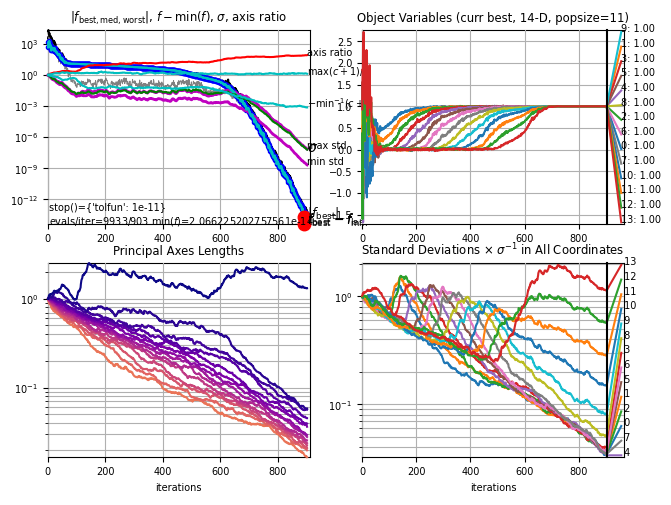

In [3]:
xopt, es = cma.fmin2(cma.ff.rosen, x0, sigma0, {'verb_disp_overwrite': 400})
es.plot();

CMA-ES without noise handling in the Rosenbrock function with additive uniform noise.

In [4]:
xopt, es = cma.fmin2(fun, x0, sigma0, {'verb_disp_overwrite': 400})

(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 14 (seed=600893, Mon Sep 16 18:18:25 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 8.256006536312090e+02 1.0e+00 8.92e-01  9e-01  9e-01 0:00.0
    2     22 1.771234163824616e+03 1.1e+00 8.10e-01  8e-01  8e-01 0:00.0
    3     33 9.813559476931641e+02 1.1e+00 7.52e-01  7e-01  8e-01 0:00.0
  100   1100 1.268054435332759e+01 2.7e+00 9.84e-03  6e-03  9e-03 0:00.1
  200   2200 1.223284031380393e+01 3.9e+00 1.09e-02  4e-03  9e-03 0:00.2
  300   3300 1.206264118490592e+01 6.2e+00 1.02e-02  3e-03  1e-02 0:00.3
  400   4400 1.206441899250684e+01 8.7e+00 5.60e-03  1e-03  5e-03 0:00.4
 1545  16995 1.202986523152333e+01 7.3e+01 2.56e-03  2e-04  8e-04 0:01.2
termination on tolstagnation=539 (Mon Sep 16 18:18:28 2024)
final/bestever f-value = 1.274893e+01 1.190150e+01 after 16996/9811 evaluations
incumbent solution: [ 0.47507595  0.21774504  0.03791591 -0.00241264 -0.01362848  0.00668877
  0.01145115  0.006

The default CMA-ES gets stuck with a typical $f$-value above 10 and a distance to the optimum above 3.

In [5]:
print_favorite(es)

ftrue(mean) = 11.937294957006864, ||mean - x_opt|| = 3.5447511812276864


Step-size(s) tend to become small (hence the mean is stuck).

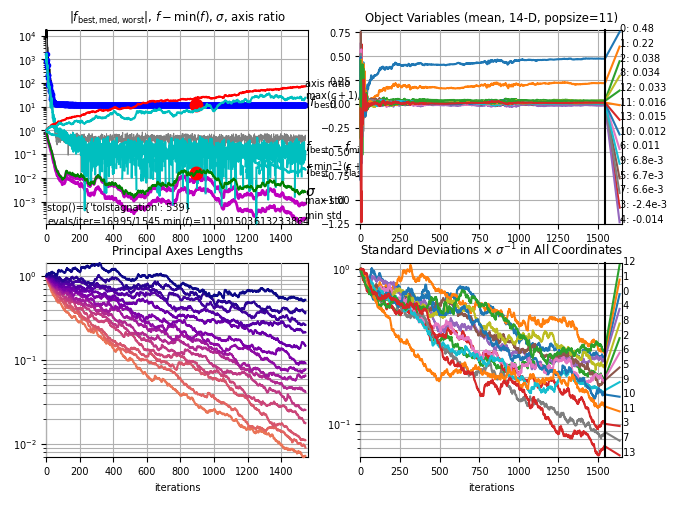

In [6]:
es.plot(plot_mean=True);

Some entries in `xfavorite` are (still) close to zero (whereas the optimal value is one).

In [7]:
es.result._asdict()  # pretty print the named tuple as dictionary

{'xbest': array([ 0.46002857,  0.20282797,  0.03696337,  0.00594152, -0.00877412,
         0.00758017,  0.00933235,  0.0186552 ,  0.01375361,  0.00535192,
         0.02255255,  0.00988686,  0.0223746 ,  0.01905249]),
 'fbest': 11.901503613233864,
 'evals_best': 9811,
 'evaluations': 16996,
 'iterations': 1545,
 'xfavorite': array([ 0.47507595,  0.21774504,  0.03791591, -0.00241264, -0.01362848,
         0.00668877,  0.01145115,  0.00664349,  0.03384635,  0.00675039,
         0.0120838 ,  0.01569882,  0.03330584,  0.0151459 ]),
 'stds': array([0.00069086, 0.00072219, 0.00050813, 0.00025519, 0.00068432,
        0.00048854, 0.00050194, 0.00022569, 0.00058155, 0.0004208 ,
        0.00039482, 0.00033039, 0.00078278, 0.00018257]),
 'stop': {'tolstagnation': 539}}

Now, we use default noise handling for the same problem. The noise handler measures the noise level based on rank changes of reevaluated solutions and increases the step-size when a too high noise level is detected (Hansen et al 2008, _A method for uncertainty handling..._).

In [8]:
xopt, es = cma.fmin2(fun, x0, sigma0, {'verb_disp_overwrite': 400, # 'popsize_factor': 3,
        }, noise_handler=True)

(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 14 (seed=623530, Mon Sep 16 18:18:29 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     13 6.535788761066290e+02 1.1e+00 8.97e-01  9e-01  9e-01 0:00.0
    2     27 8.459304242484141e+02 1.1e+00 7.98e-01  8e-01  8e-01 0:00.0
    3     41 6.223169430788389e+02 1.2e+00 7.30e-01  7e-01  7e-01 0:00.0
  100   1357 1.265243508082664e+01 2.3e+00 3.21e-02  2e-02  3e-02 0:00.4
  200   2711 1.229148910716592e+01 3.5e+00 6.27e-02  2e-02  4e-02 0:00.8
  300   4063 1.117358150069849e+01 4.0e+00 7.96e-02  2e-02  4e-02 0:00.9
  400   5430 9.604240579876821e+00 6.3e+00 1.39e-01  2e-02  4e-02 0:01.2
 1950  26429 7.680448355780684e-01 2.8e+01 4.78e+01  1e-02  1e-01 0:05.2
termination on tolstagnation=539 (Mon Sep 16 18:18:34 2024)
final/bestever f-value = 6.516226e-01 2.423819e-01 after 26430/22344 evaluations
incumbent solution: [1.01382348 0.99628547 0.99079348 0.98587931 1.00171059 1.00025816
 0.99763685 0.99025036 .

The typical final $f$-value and the distance to the optimum are roughly ten times smaller.

In [9]:
print_favorite(es)

ftrue(mean) = 0.29410720648816, ||mean - x_opt|| = 0.19463725918400185


With noise handling, the CMA-ES does not get stuck and keeps searching with a somewhat constant variance (which will never converge). The step-size (green line) systematically increases, the smallest standard deviation (magenta line) does never drop far below $10^{-2}$.

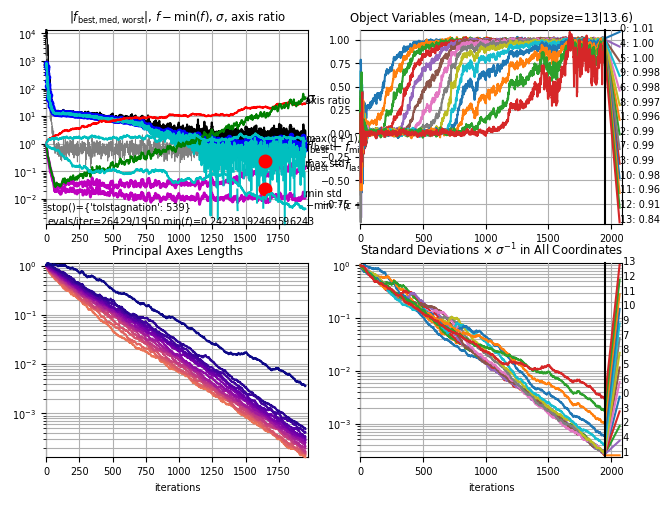

In [10]:
es.plot(plot_mean=True);

All entries in `xfavorite` get consistently close-ish to 1. We could probably estimate a notably better solution by averaging the mean over some past iterations where the $f$-value was stagnating.

In [11]:
dict(es.result._asdict())  # pretty print the named tuple as dictionary

{'xbest': array([1.00454099, 1.00345315, 1.00608464, 1.00070558, 1.00456102,
        0.99400138, 0.99363569, 0.9954572 , 0.99537869, 0.99557034,
        0.97003753, 0.9328617 , 0.88282517, 0.78797199]),
 'fbest': 0.24238192469596243,
 'evals_best': 22344,
 'evaluations': 26430,
 'iterations': 1950,
 'xfavorite': array([1.01382348, 0.99628547, 0.99079348, 0.98587931, 1.00171059,
        1.00025816, 0.99763685, 0.99025036, 0.99746068, 0.99804357,
        0.97503183, 0.95604326, 0.90954752, 0.83707837]),
 'stds': array([0.01281916, 0.01197427, 0.01266038, 0.01267892, 0.01260953,
        0.01359957, 0.01336669, 0.01404636, 0.01378308, 0.01980062,
        0.0282031 , 0.04864664, 0.08321298, 0.1423701 ]),
 'stop': {'tolstagnation': 539}}

We increase the population size by a factor of four.

In [12]:
xopt, es = cma.fmin2(fun, x0, sigma0, {'verb_disp_overwrite':400, 'popsize_factor': 4,
        }, noise_handler=True)

(23_w,47)-aCMA-ES (mu_w=13.2,w_1=14%) in dimension 14 (seed=657074, Mon Sep 16 18:18:35 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     52 5.942114463895798e+02 1.2e+00 9.22e-01  9e-01  9e-01 0:00.0
    2    103 3.869603813415648e+02 1.2e+00 7.81e-01  7e-01  8e-01 0:00.0
    3    154 3.672763622430655e+02 1.2e+00 6.94e-01  6e-01  7e-01 0:00.1
  100   5143 9.471578589066141e+00 9.9e+00 1.74e-01  3e-02  9e-02 0:00.4
  200  10275 4.587155797003286e+00 1.3e+01 4.04e-01  1e-02  6e-02 0:00.8
  300  15408 1.289996079959528e+00 1.5e+01 1.59e+00  1e-02  7e-02 0:01.3
  400  20551 6.198339864466313e-01 2.6e+01 5.22e+00  1e-02  1e-01 0:01.7
  883  45359 2.360625152832252e-01 3.8e+01 4.40e+03  1e-02  2e-01 0:03.5
termination on tolstagnation=539 (Mon Sep 16 18:18:39 2024)
final/bestever f-value = 1.006329e-01 1.006329e-01 after 45360/45360 evaluations
incumbent solution: [0.99795214 1.001572   0.99853437 0.99640367 0.99898338 0.99775592
 0.99299141 0.99315252

With a larger population size, in expectation a better final solution is returned.

In [13]:
print_favorite(es)

ftrue(mean) = 0.04755754676874842, ||mean - x_opt|| = 0.08804933706340479


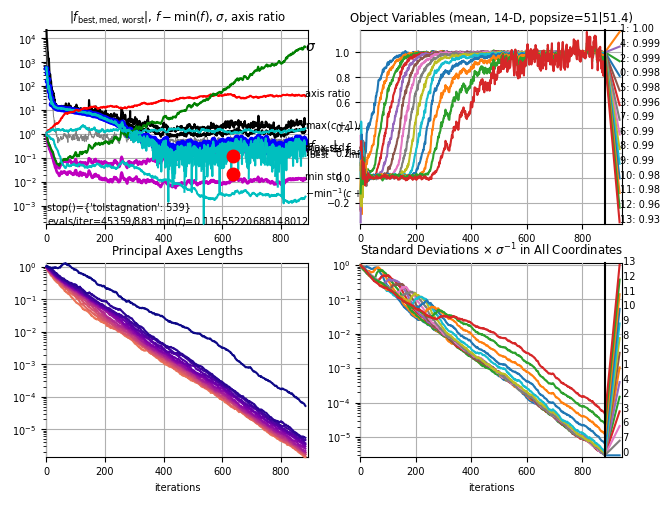

In [14]:
es.plot(plot_mean=True);

`xfavorite` is noticeably closer to the global optimum.

In [15]:
es.result._asdict()  # pretty print the named tuple as dictionary

{'xbest': array([0.99795214, 1.001572  , 0.99853437, 0.99640367, 0.99898338,
        0.99775592, 0.99299141, 0.99315252, 0.99173402, 0.98852508,
        0.98269626, 0.98039508, 0.96244624, 0.92696025]),
 'fbest': 0.1006329036161679,
 'evals_best': 45360,
 'evaluations': 45360,
 'iterations': 883,
 'xfavorite': array([0.99795214, 1.001572  , 0.99853437, 0.99640367, 0.99898338,
        0.99775592, 0.99299141, 0.99315252, 0.99173402, 0.98852508,
        0.98269626, 0.98039508, 0.96244624, 0.92696025]),
 'stds': array([0.01286388, 0.0144061 , 0.01363796, 0.01346441, 0.01413203,
        0.01448657, 0.01333334, 0.01317242, 0.01510812, 0.01640793,
        0.02790353, 0.05112688, 0.10135608, 0.19817389]),
 'stop': {'tolstagnation': 539}}

Not shown: playing with an asymmetric step-size damping factor seems to be less effective than the above shown noise handling.

Using reevaluations as additional noise treatment works for finding better solutions, but tends to be overly costly for the moderate improvement:

(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 14 (seed=639675, Mon Sep 16 18:18:40 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     13 1.309095946807187e+03 1.1e+00 8.91e-01  9e-01  9e-01 0:00.0
    2     26 2.493669080299259e+03 1.2e+00 8.43e-01  8e-01  9e-01 0:00.0
    3     39 7.095312258805128e+02 1.2e+00 7.64e-01  7e-01  8e-01 0:00.0
  100   1541 1.281534110778583e+01 2.4e+00 3.07e-02  2e-02  3e-02 0:00.3
  200  12521 1.092654012382007e+01 4.6e+00 3.84e-02  1e-02  3e-02 0:00.7
  300 102834 8.936384037693172e+00 8.8e+00 4.06e-02  1e-02  3e-02 0:02.4
  400 202923 6.362309772734855e+00 1.1e+01 2.99e-02  5e-03  2e-02 0:04.0
 1072 5011736 5.217490939899208e-01 3.9e+01 1.69e-01  2e-03  4e-02 1:03.0
termination on maxfevals=5000000.0 (Mon Sep 16 18:19:43 2024)
final/bestever f-value = 9.729625e-01 4.693383e-01 after 5011737/4697431 evaluations
incumbent solution: [0.99855467 1.00051626 0.99909635 0.99847415 1.00096926 0.99854951
 1.00009552 0.996

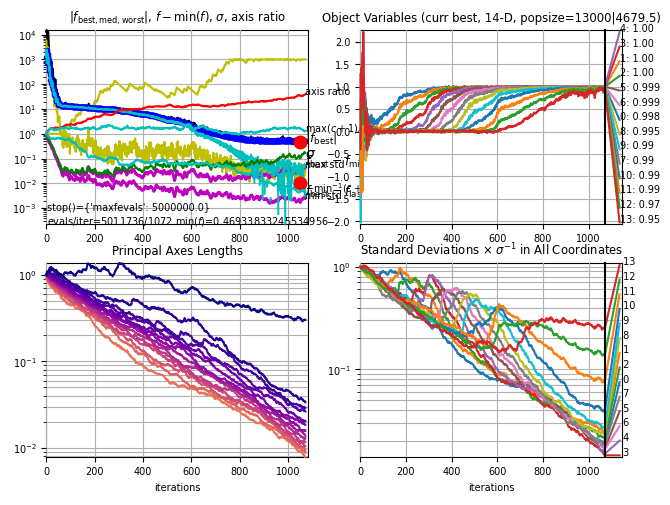

In [16]:
xopt, es = cma.fmin2(fun, x0, sigma0, {'verb_disp_overwrite':400, 'maxfevals': 5e6,
        }, noise_handler=cma.NoiseHandler(len(x0), [1, 1, 1000]))
es.plot();

The yellow line tracks the number of reevaluations per solution in the iteration. For the last 200 iterations it is at the given limit of 1000, hence we make 13,000 evaluations per iteration.

In [17]:
cma.NoiseHandler?

Init signature:
cma.NoiseHandler(
    N,
    maxevals=[1, 1, 1],
    aggregate=<function median at 0x105221730>,
    reevals=None,
    epsilon=1e-07,
    parallel=False,
)
Docstring:     
Noise handling according to [Hansen et al 2009, A Method for
Handling Uncertainty in Evolutionary Optimization...]

The interface of this class is yet versatile and subject to changes.

The noise handling follows closely [Hansen et al 2009] in the
measurement part, but the implemented treatment is slightly
different: for ``noiseS > 0``, ``evaluations`` (time) and sigma are
increased by ``alpha``. For ``noiseS < 0``, ``evaluations`` (time)
is decreased by ``alpha**(1/4)``.

The (second) parameter ``evaluations`` defines the maximal number
of evaluations for a single fitness computation. If it is a list,
the smallest element defines the minimal number and if the list has
three elements, the median value is the start value for
``evaluations``.

`NoiseHandler` serves to control the noise via steps-size
in

## See Also

Other [`notebooks and recipes`](https://github.com/CMA-ES/pycma/tree/development/notebooks), as this one, can be found at [https://github.com/CMA-ES/pycma/tree/development/notebooks](https://github.com/CMA-ES/pycma/tree/development/notebooks)